# Introduction and Data Overview:

This project endeavours to leverage the transformative potential of machine learning in the realm of seismic activity prediction, addressing one of the most devastating natural phenomena - earthquakes. It uses a big collection of data on past earthquakes from all over the world to make models that can guess how strong future earthquakes will be and how likely they are to happen. The goal is to improve early warning systems, help manage disasters better, and support scientific research. This could help reduce the terrible effects of earthquakes, like saving lives and reducing damage to buildings and other property.

The ultimate earthquake dataset is a comprehensive and detailed record of all the earthquakes that have occurred around the world from 1990 to 2023. It's a massive dataset, containing about three million rows, with each row corresponding to a different earthquake. For every earthquake recorded, the dataset includes a variety of important details. These include the date and time when the earthquake happened, its geographic coordinates (latitude and longitude), and the magnitude, which tells us how strong the earthquake was. Additionally, the dataset specifies the type of scale used to measure the earthquake's magnitude, the region that was affected by the earthquake, and other relevant information. This makes it an invaluable resource for understanding and analysing seismic events on a global scale.

Dataset Link: https://www.kaggle.com/datasets/alessandrolobello/the-ultimate-earthquake-dataset-from-1990-2023

# Importing Libraries:

In [1]:
# Basics Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plots
import plotly.express as px
import plotly.graph_objects as go

# Importing Dataset:

In [2]:
Data = pd.read_csv("/Users/vd/Documents/Project Datasets/Earthquake Dataset/Eartquakes-1990-2023.csv")
Data.head()

time                                 place    status  tsunami  \
0  631153353990     12 km NNW of Meadow Lakes, Alaska  reviewed        0   
1  631153491210            14 km S of Volcano, Hawaii  reviewed        0   
2  631154083450            7 km W of Cobb, California  reviewed        0   
3  631155512130  11 km E of Mammoth Lakes, California  reviewed        0   
4  631155824490                16km N of Fillmore, CA  reviewed        0   

   significance   data_type  magnitudo        state   longitude   latitude  \
0            96  earthquake       2.50       Alaska -149.669200  61.730200   
1            31  earthquake       1.41       Hawaii -155.212333  19.317667   
2            19  earthquake       1.11   California -122.806167  38.821000   
3            15  earthquake       0.98   California -118.846333  37.664333   
4           134  earthquake       2.95   California -118.934000  34.546000   

    depth                              date  
0  30.100  1990-01-01 00:22:33.990000+00:00  
1   6.585  1990-01-01 00:24:51.210000+00:00  
2   3.220  1990-01-01 00:34:43.450000+00:00  
3  -0.584  1990-01-01 00:58:32.130000+00:00  
4  16.122  1990-01-01 01:03:44.490000+00:00

# Data Overview:

In [3]:
# Basic Statistics

Data.describe()

time       tsunami  significance     magnitudo     longitude  \
count  3.445751e+06  3.445751e+06  3.445751e+06  3.445751e+06  3.445751e+06   
mean   1.247124e+12  4.434447e-04  7.400973e+01  1.774076e+00 -1.012876e+02   
std    2.976292e+11  2.105346e-02  1.016364e+02  1.291055e+00  7.697416e+01   
min    6.311534e+11  0.000000e+00  0.000000e+00 -9.990000e+00 -1.799997e+02   
25%    1.024401e+12  0.000000e+00  1.300000e+01  9.100000e-01 -1.464274e+02   
50%    1.282338e+12  0.000000e+00  3.300000e+01  1.460000e+00 -1.189538e+02   
75%    1.508701e+12  0.000000e+00  8.100000e+01  2.300000e+00 -1.159277e+02   
max    1.690629e+12  1.000000e+00  2.910000e+03  9.100000e+00  1.800000e+02   

           latitude         depth  
count  3.445751e+06  3.445751e+06  
mean   3.746483e+01  2.285387e+01  
std    2.041577e+01  5.484938e+01  
min   -8.442200e+01 -1.000000e+01  
25%    3.406400e+01  3.120000e+00  
50%    3.793567e+01  7.700000e+00  
75%    4.784800e+01  1.612000e+01  
max    8.738600e+01  7.358000e+02

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 315.5+ MB


In [5]:
# Check for Unique Values in Categorical Columns

selected_columns = ['status', 'tsunami', 'data_type']

for column in selected_columns:
    unique_values = Data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in status: ['reviewed' 'automatic' 'AUTOMATIC' 'REVIEWED' 'MANUAL' 'manual']
Unique values in tsunami: [0 1]
Unique values in data_type: ['earthquake' 'quarry blast' 'explosion' 'other event' 'nuclear explosion'
 'rock burst' 'ice quake' 'chemical explosion' 'sonic boom'
 'mine collapse' 'rockslide' 'Rock Slide' 'accidental explosion'
 'landslide' 'quarry' 'mining explosion' 'acoustic noise' 'not reported'
 'experimental explosion' 'collapse' 'meteorite'
 'induced or triggered event' 'volcanic eruption' 'Ice Quake'
 'snow avalanche']


In [6]:
# Time Range Covered by the Dataset

Data['date'].min(), Data['date'].max()

('1990-01-01 00:22:33.990000+00:00', '2023-07-29 11:08:57.884000+00:00')

# Data Cleaning:

In the data preparation phase, I noted the dataset was complete with no missing details, which simplified the initial steps. I discovered that there are 16,869 duplicate records which are likely from repeated entries or data merging errors and I promptly removed them to ensure cleaner analysis.

In [7]:
# Checking for Missing Values

Data.isna().sum()

time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
magnitudo       0
state           0
longitude       0
latitude        0
depth           0
date            0
dtype: int64

In [8]:
# Checking for Duplicate Values

Data.duplicated().sum()

16869

In [9]:
# Removing Duplicate Values

Data.drop_duplicates(inplace = True)

In [10]:
Data.duplicated().sum()

0

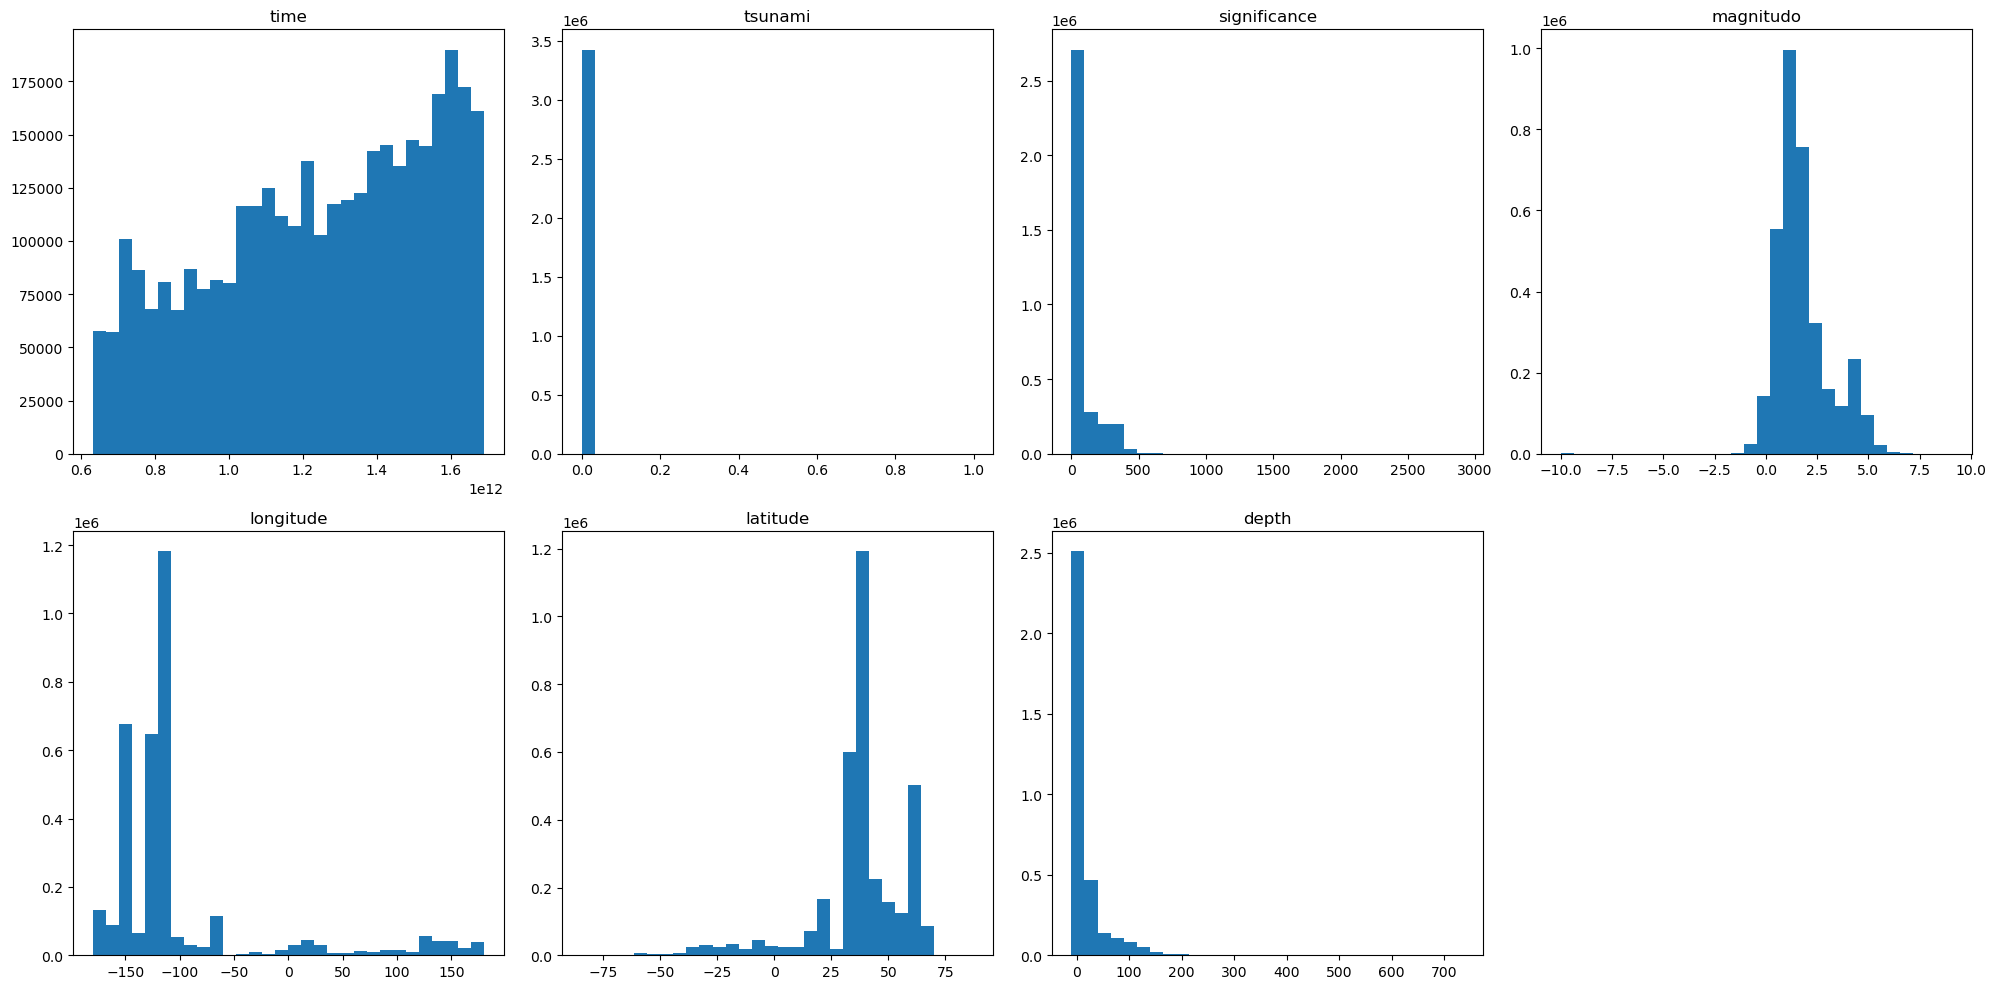

In [11]:
# Selecting numeric columns
numeric_cols = Data.select_dtypes(include='number')

# Setting up the subplot grid
n_cols = 4  # Adjust the number of columns
n_rows = int(numeric_cols.shape[1] / n_cols) + (numeric_cols.shape[1] % n_cols > 0)

plt.figure(figsize=(20, 5 * n_rows))  # Adjust the size

# Creating histograms for each numeric column
for i, column in enumerate(numeric_cols.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(numeric_cols[column], bins=30)
    plt.title(column)

plt.tight_layout()
plt.show()

In [12]:
correlation = Data['depth'].corr(Data['magnitudo'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.3569654691915349


The depth and significance variables in the dataset show a pronounced right-skew, suggesting the potential for log transformation to normalise their distribution. Despite this, models are yielding robust results without transformation, except for a slight MSE improvement in linear regression after transformation. This modest gain hints at a non-linear relationship between depth and magnitude, as the low correlation coefficient implies a more complex than linear interaction between these variables.

# EDA:

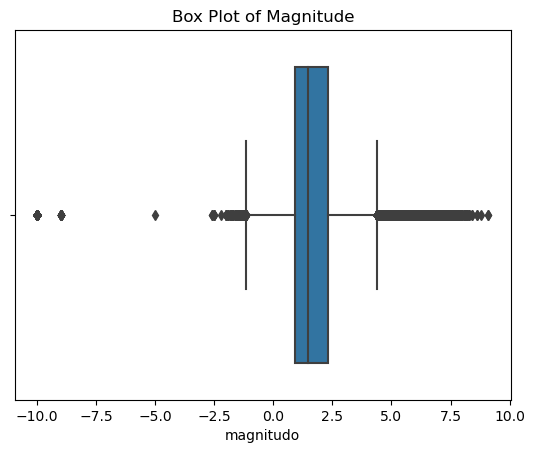

In [13]:
# Box plot for outlier detection
sns.boxplot(x=Data['magnitudo'])
plt.title('Box Plot of Magnitude')
plt.show()

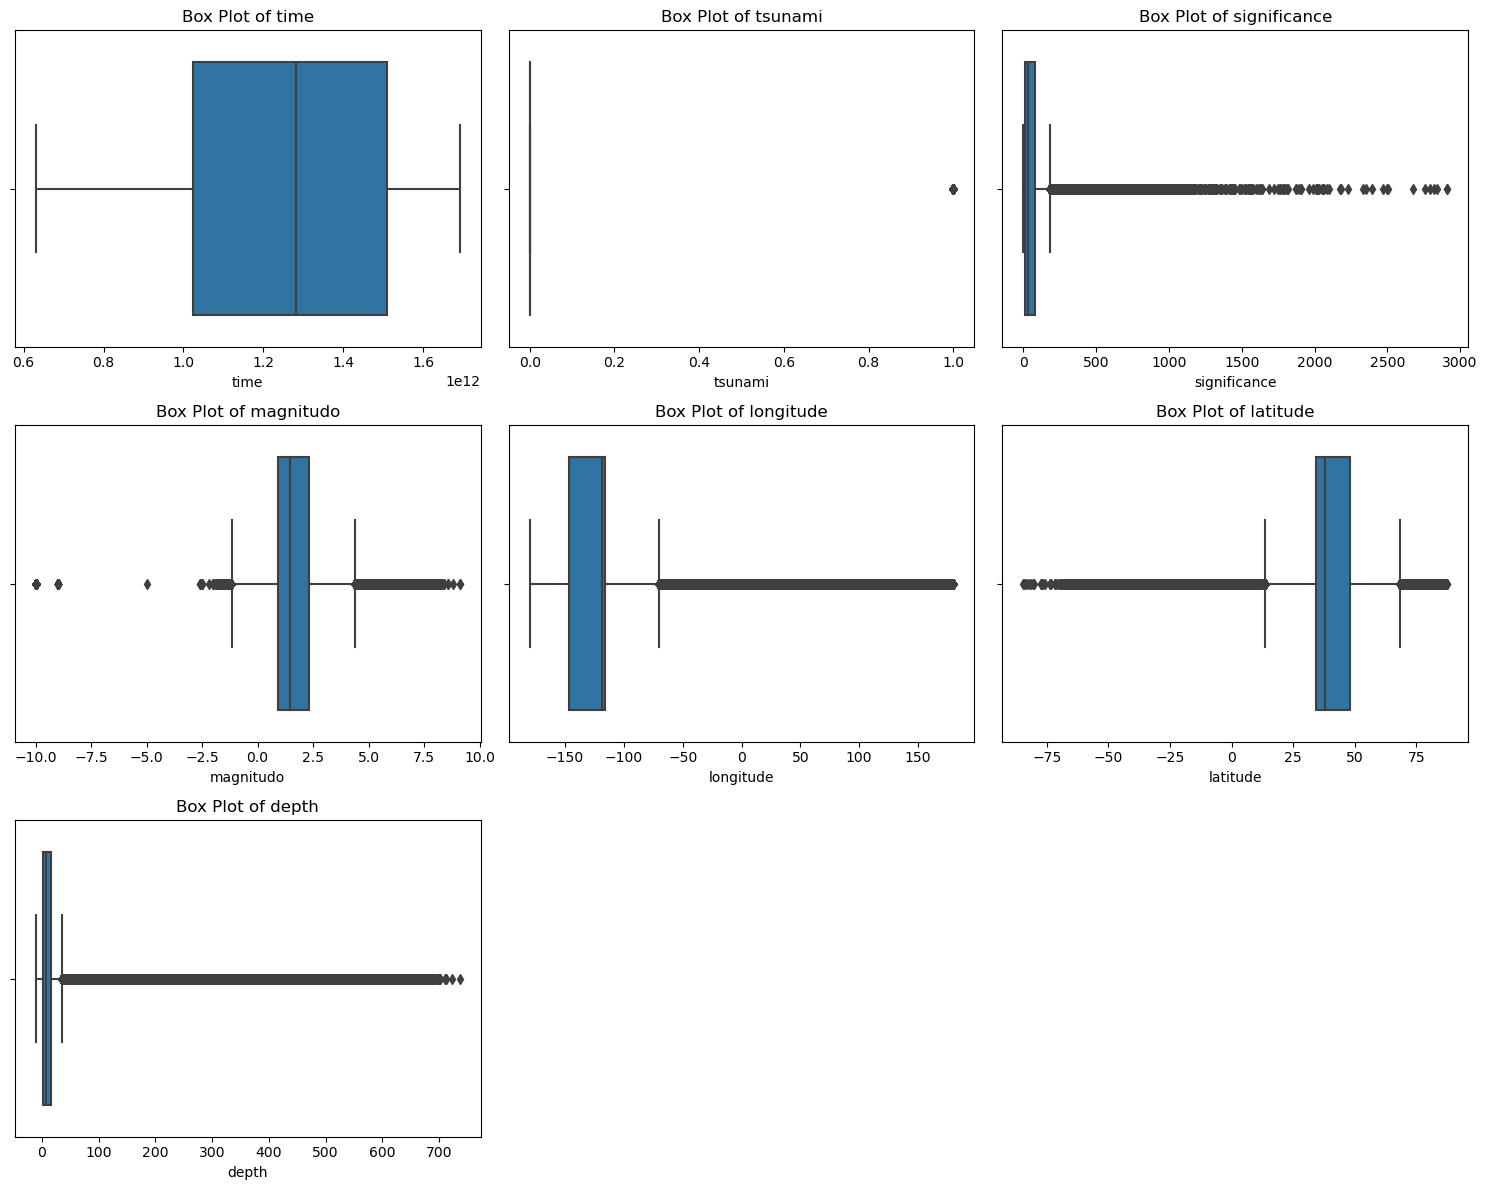

In [14]:
numeric_cols = Data.select_dtypes(include=['int64', 'float64']).columns

# Determine the number of rows/columns for the subplot grid
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, column in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x=Data[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout() # Adjusting a layout
plt.show()

The 'magnitudo' variable showed some negative values, indicating small seismic events. I chose to retain these to accurately reflect minor earthquakes, setting a threshold at -2.5 to avoid skewing results with very rare extreme negatives. This careful pruning of the data aimed to preserve the authenticity of the seismic records while ensuring the statistical analysis remained sound.

In [15]:
# Remove rows where magnitude is less than -2.5
Data = Data[Data['magnitudo'] >= -2.5]

## Data Visualization and Finding Patterns:

For the data visualisation part, I am going through a comprehensive overview of the seismic data, focusing on various attributes such as the distribution of earthquake magnitudes over time, the geographical occurrence of earthquakes, their review status, and the frequency by state. Each chart serves to illuminate different aspects of the data, drawing attention to patterns, trends, and outliers that could be pivotal for further analysis.

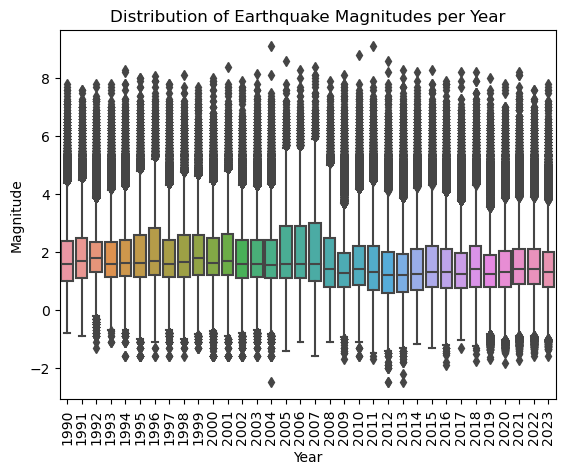

In [16]:
# Visualization 1: 

Data['date'] = pd.to_datetime(Data['date'])  # Convert the date column to datetime
Data['year'] = Data['date'].dt.year  # Extract the year

# Now, create the boxplot using individual magnitudes, not the sum
sns.boxplot(x='year', y='magnitudo', data=Data)
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.title("Distribution of Earthquake Magnitudes per Year")
plt.xticks(rotation=90)
plt.show()

The box plot shows the variability of earthquake magnitudes over the years, with a clear depiction of the range and central tendency for each year which can be vital for understanding trends and preparing for future seismic activity.

In [17]:
# Visualization 2:

# Normalize the 'state' column by stripping whitespace and converting to a consistent case
Data['state'] = Data['state'].str.strip().str.lower().str.capitalize()

# Now re-count the values
state_counts = Data['state'].value_counts()

# Top 10 states with highest number of earthquakes
top10_states = state_counts[:10]

# Create the updated bar plot
fig = px.bar(
    y=top10_states.values,
    x=top10_states.index,
    color=top10_states.index,
    color_discrete_sequence=px.colors.sequential.PuBuGn,
    text=top10_states.values,
    title='Top 10 States with Combined California Count',
    template='plotly_white'
)

fig.update_layout(
    title_text='State Distribution with Combined California Count',
    height=700,
    xaxis_title='State',
    yaxis_title="Count",
    font=dict(size=17, family="Franklin Gothic")
)

# Display the plot
fig.show()

The bar chart presents the earthquake count by state, highlighting California's significantly higher frequency compared to other regions, so we can identify which locations are more prone to earthquake events.

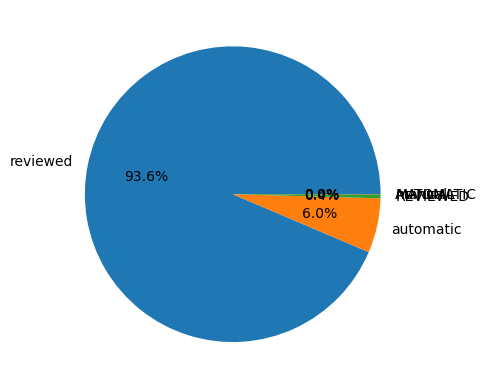

In [18]:
# Visualization 3:

# Pie chart for status distribution
status_counts = Data['status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct="%0.1f%%")
plt.show()

From the pie chart, it is evident that the vast majority of the events have been reviewed, with a small fraction classified as automatic, which is important for assessing the reliability of the analysis.

In [19]:
# Visualization 4:

Data['year'] = pd.to_numeric(Data['date'].dt.year)

def plot_strongest(Data):
    # Group by 'state' and get the max 'significance' and 'magnitude'
    gb_top = Data.groupby(["state"])\
               .agg({"significance":"max", "magnitudo":"max"})\
               .reset_index()

    # Create a DataFrame with necessary columns
    b = Data[["year", "state", "significance", "longitude", "latitude", "magnitudo"]]
    
    # Merge the top values with the original DataFrame based on state and significance/magnitude
    merge = pd.merge(gb_top, b, how="left", on=["state", "significance", "magnitudo"]).sort_values(by="year")

    # Create a scatter_geo plot
    fig = px.scatter_geo(merge, 
                         lat="latitude", lon="longitude", 
                         size="significance",
                         animation_frame="year",
                         projection="natural earth",
                         title="Strongest Earthquake by Year",
                         template='plotly_white'
                        )
    fig.show()

# Call the function with DataFrame
plot_strongest(Data)

The map animation pinpoints the locations of the most intense earthquakes globally each year which can help with visualising the geographic distribution of earthquake risk and can be a powerful tool for communicating the global impact of earthquakes.

## Correlation Matrix for Feature Selection:

In my model's feature selection, the correlation matrix was instrumental, efficiently highlighting the extent of linear relationships between variables. A perfect correlation is indicated by values of +1 or -1. This step is critical in avoiding multicollinearity, which can obscure the true effects in predictive models.

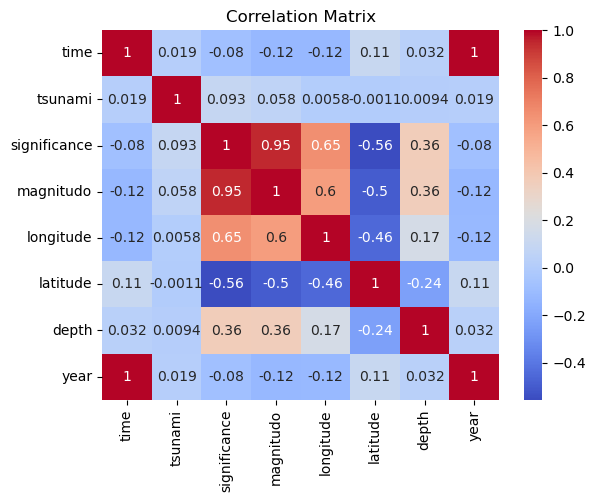

In [20]:
# Select only numeric columns for correlation matrix
numeric_columns = Data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

# Plot heatmap of correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
# First, let's drop the 'significance' column
final_Data = numeric_columns.drop('significance', axis=1)

I considered only numerical variables and found 'significance' to be highly correlated with 'magnitude'. To maintain model accuracy and efficiency and also to avoid multicollinearity, 'significance' was excluded from the feature set.

The final model includes seven features: ‘time’, ‘tsunami’, ‘magnitude’, ‘longitude’, ‘latitude’, ‘depth’, and ‘year’. These were selected for their potential to predict earthquake activity effectively without undue inter-correlation, setting the stage for a robust and insightful modelling process.

# Model Selection:

I split the final data into a train and test set. I split the data into 80% training set and 20% test set. After Data visualisation, all the features left happened to be numerical variables so there is no need to further handle it. For the modelling, my features are ‘time’, ‘tsunami’, ‘longitude’, ‘latitude’, ‘depth’, and ‘year’ and my target variable is ‘magnitudo’.

In [22]:
# Importing Machine Learning Libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Linear Regression:

In [23]:
# Now, let's separate the features and the target variable
X = final_Data.drop('magnitudo', axis=1)  # Features (independent variables)
y = final_Data['magnitudo']  # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error (MSE): 0.867175262758308
R-squared Score: 0.4727685433716343


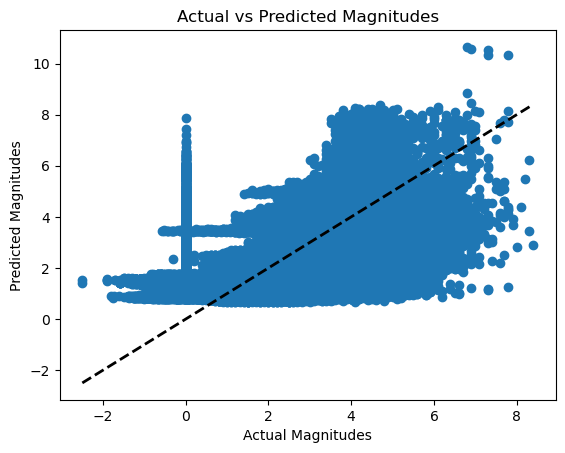

In [24]:
# Now, create the plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Magnitudes')
plt.ylabel('Predicted Magnitudes')
plt.title('Actual vs Predicted Magnitudes')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()

## Ridge and LASSO Regression:

In [25]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Ensures that all features are standardized
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Ridge regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)

# Evaluate Ridge regression model
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Ridge Regression R-squared: {ridge_r2}')

# Create Lasso regression model
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso_model.fit(X_train_scaled, y_train)
lasso_pred = lasso_model.predict(X_test_scaled)

# Evaluate Lasso regression model
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
print(f'Lasso Regression MSE: {lasso_mse}')
print(f'Lasso Regression R-squared: {lasso_r2}')

Ridge Regression MSE: 0.867175271459944
Ridge Regression R-squared: 0.47276853808115105
Lasso Regression MSE: 0.8961102171691138
Lasso Regression R-squared: 0.45517646156690195


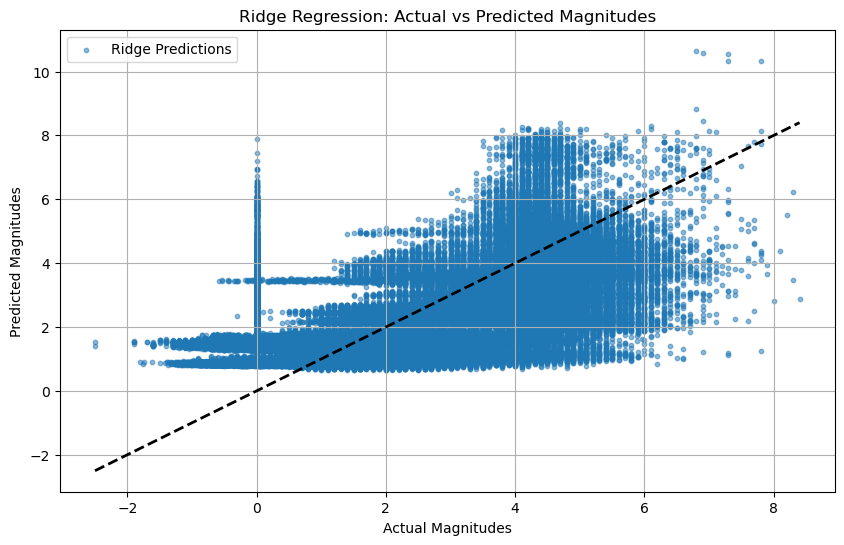

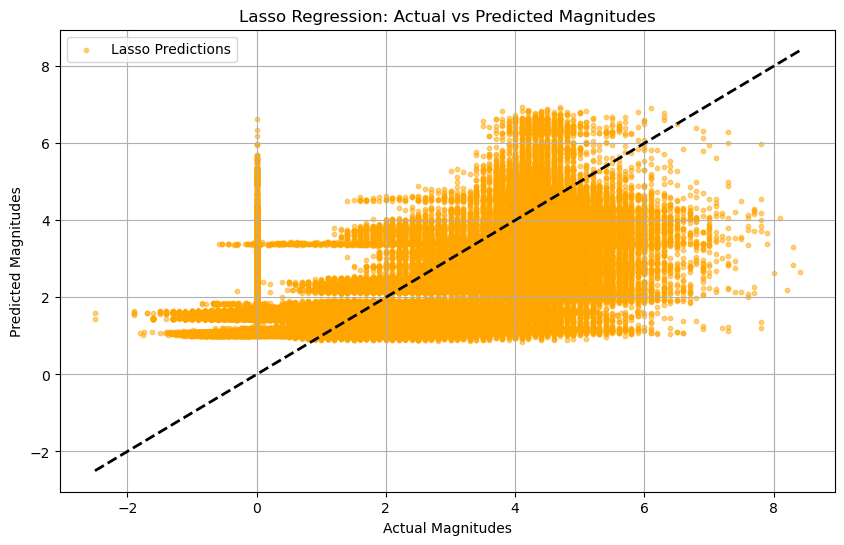

In [26]:
# Plot for Ridge Regression
plt.figure(figsize=(10, 6)) 
plt.scatter(y_test, ridge_pred, alpha=0.5, s=10, label='Ridge Predictions')
plt.xlabel('Actual Magnitudes')
plt.ylabel('Predicted Magnitudes')
plt.title('Ridge Regression: Actual vs Predicted Magnitudes')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.legend()
plt.grid(True)
plt.show()

# Plot for Lasso Regression
plt.figure(figsize=(10, 6))  
plt.scatter(y_test, lasso_pred, alpha=0.5, s=10, color='orange', label='Lasso Predictions') 
plt.xlabel('Actual Magnitudes')
plt.ylabel('Predicted Magnitudes')
plt.title('Lasso Regression: Actual vs Predicted Magnitudes')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.legend()
plt.grid(True)
plt.show()

## KNN Regressor:

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)  # n_neighbors can be tuned

# Train the KNN regressor
knn.fit(X_train_scaled, y_train)

# Predicting the Test set results
knn_pred = knn.predict(X_test_scaled)

# Calculating the Mean Squared Error and R-squared Score
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

print(f"Mean Squared Error (MSE): {knn_mse}")
print(f"R-squared Score: {knn_r2}")

Mean Squared Error (MSE): 0.3168160580493766
R-squared Score: 0.8073798931517902


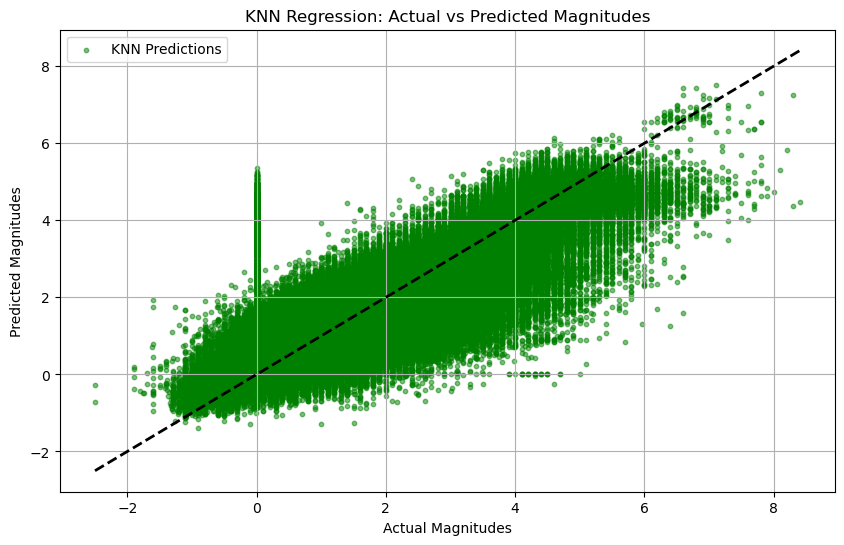

In [28]:
# Create the plot for KNN Regression
plt.figure(figsize=(10, 6))  
plt.scatter(y_test, knn_pred, alpha=0.5, s=10, color='green', label='KNN Predictions') 
plt.xlabel('Actual Magnitudes')
plt.ylabel('Predicted Magnitudes')
plt.title('KNN Regression: Actual vs Predicted Magnitudes')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line representing perfect predictions
plt.legend()
plt.grid(True)
plt.show()

## DecisionTree Regressor:

In [29]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the regressor
dt_regressor.fit(X_train, y_train)

# Predicting the Test set results
dt_pred = dt_regressor.predict(X_test)

# Calculating the Mean Squared Error and R-squared Score
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print(f"Decision Tree - Mean Squared Error (MSE): {dt_mse}")
print(f"Decision Tree - R-squared Score: {dt_r2}")

Decision Tree - Mean Squared Error (MSE): 0.4802567850089626
Decision Tree - R-squared Score: 0.7080100238208676


## RandomForest Regressor:

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Predicting the Test set results
rf_pred = rf_regressor.predict(X_test)

# Calculating the Mean Squared Error and R-squared Score
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest - Mean Squared Error (MSE): {rf_mse}")
print(f"Random Forest - R-squared Score: {rf_r2}")

Random Forest - Mean Squared Error (MSE): 0.25142699009486585
Random Forest - R-squared Score: 0.8471356092403343


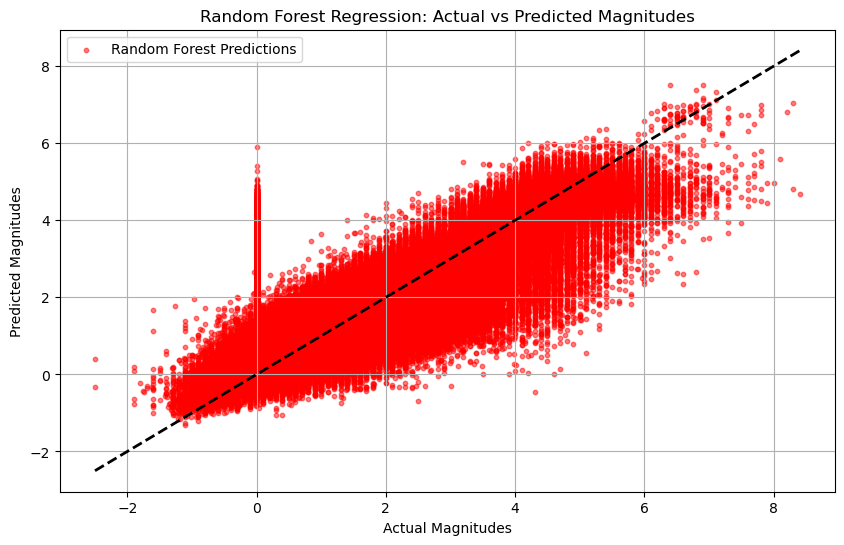

In [31]:
# Create the plot for Random Forest Regression
plt.figure(figsize=(10, 6))  
plt.scatter(y_test, rf_pred, alpha=0.5, s=10, color='red', label='Random Forest Predictions')  
plt.xlabel('Actual Magnitudes')
plt.ylabel('Predicted Magnitudes')
plt.title('Random Forest Regression: Actual vs Predicted Magnitudes')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for perfect predictions
plt.legend()
plt.grid(True)
plt.show()

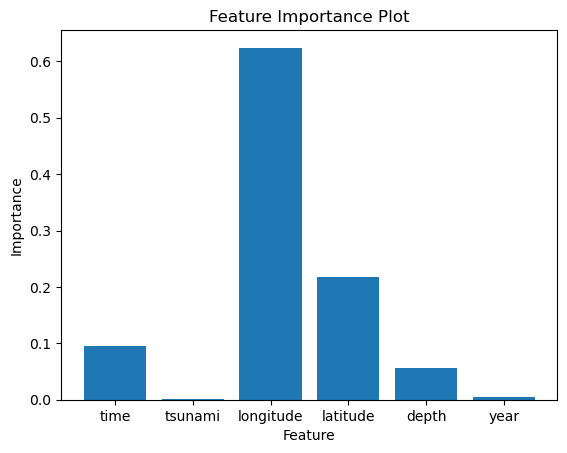

In [32]:
# Feature importance for Random Forest Regressor

importances = rf_regressor.feature_importances_
features = ['time', 'tsunami', 'longitude', 'latitude', 'depth', 'year']
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()

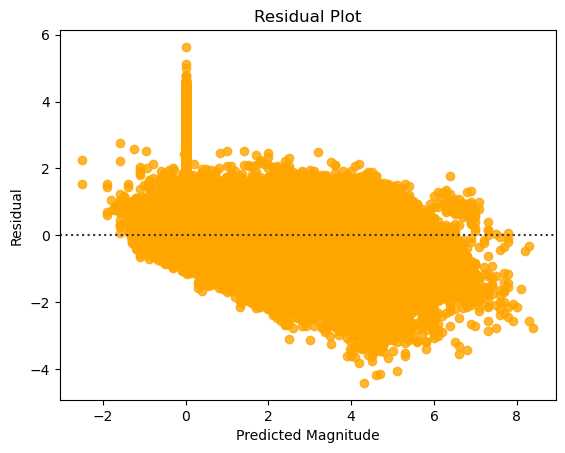

In [33]:
# Residual Plot

sns.residplot(x= y_test, y =rf_pred, color='orange')
plt.xlabel('Predicted Magnitude')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

The feature importance plot for the random forest regressor reveals 'time' and 'longitude' as the most significant predictors for earthquake magnitudes, suggesting these variables have substantial influence on the model's predictions. Conversely, 'year' holds minimal importance, indicating its limited predictive power. The accompanying residual plot shows the model's predictions are quite robust for the majority of the data, with residuals evenly distributed around the zero line, denoting an absence of bias. However, the increased spread of residuals for higher magnitude values suggests that the model's accuracy diminishes when estimating more severe earthquakes. In conclusion, the random forest regressor performs well overall, but adjustments may be beneficial for enhancing its precision, especially for larger magnitude predictions.

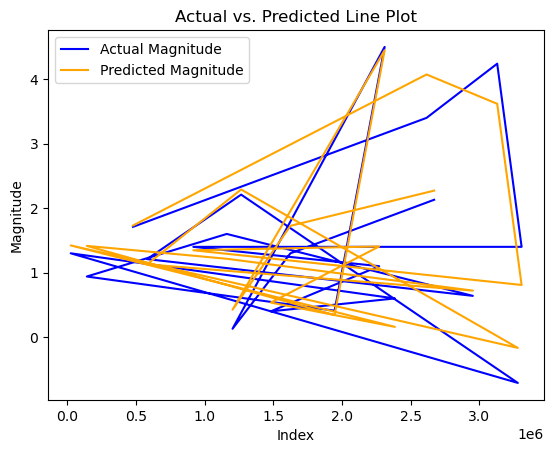

In [34]:
# Actual vs Predicted line plot

plt.plot(y_test.index[:20], y_test[:20], color='blue', label='Actual Magnitude')
plt.plot(y_test.index[:20], rf_pred[:20], color='orange', label='Predicted Magnitude')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.title('Actual vs. Predicted Line Plot')
plt.legend()
plt.show()

## XGBoost Regressor:

In [ ]:
pip install xgboost

In [35]:
import xgboost as xgb

# Create an XGBoost regressor object
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', 
                                 colsample_bytree = 0.3, 
                                 learning_rate = 0.1,
                                 max_depth = 5, 
                                 alpha = 10, 
                                 n_estimators = 100)

# Fit the regressor to the training set
xgb_regressor.fit(X_train, y_train)

# Predicting the Test set results
xgb_pred = xgb_regressor.predict(X_test)

# Calculate the Mean Squared Error and R-squared Score
mse = mean_squared_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)

print(f"XGBoost Regressor - Mean Squared Error (MSE): {mse}")
print(f"XGBoost Regressor - R-squared Score: {r2}")

XGBoost Regressor - Mean Squared Error (MSE): 0.5016532921772334
XGBoost Regressor - R-squared Score: 0.6950012214189121


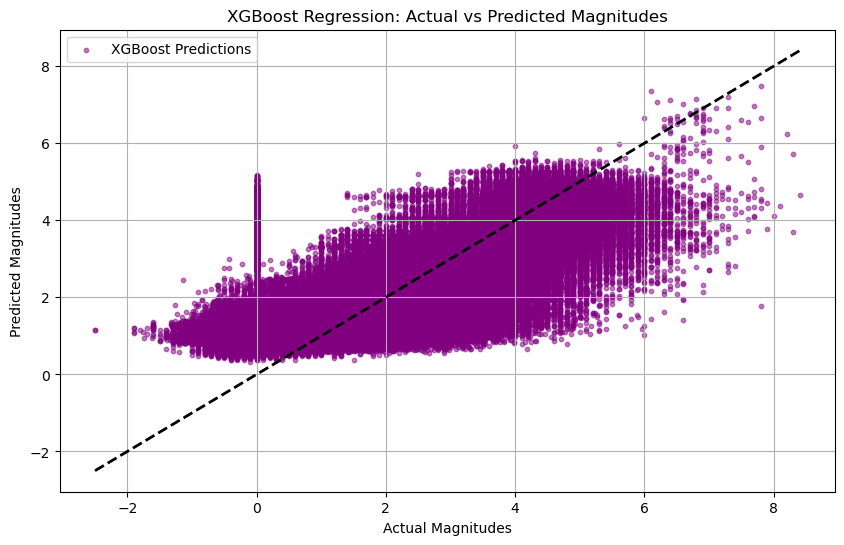

In [36]:
# Create the plot for XGBoost Regression
plt.figure(figsize=(10, 6)) 
plt.scatter(y_test, xgb_pred, alpha=0.5, s=10, color='purple', label='XGBoost Predictions')
plt.xlabel('Actual Magnitudes')
plt.ylabel('Predicted Magnitudes')
plt.title('XGBoost Regression: Actual vs Predicted Magnitudes')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for perfect predictions
plt.legend()
plt.grid(True)
plt.show()

# Conclusion:

In conclusion, the analysis highlights the random forest model's standout performance in earthquake magnitude prediction. Its robustness, evident through superior metrics such as low MSE and high R-squared values, coupled with its precise predictive accuracy, solidifies its role as a dependable tool for seismic risk assessment. Such findings carry substantial implications for enhancing disaster preparedness strategies, refining building codes, and optimizing emergency response plans. 

Therefore, the random forest model emerges as a cornerstone in seismological applications, offering invaluable insights for mitigating earthquake-related risks and bolstering community resilience.

# Appendix: Tableau Visualisations

https://public.tableau.com/views/EarthquakeVisualization1/Sheet1?:language=en-US&:display_count=n&:origin=viz_share_link

https://public.tableau.com/views/EarthquakeVisualization2/Sheet2?:language=en-US&:display_count=n&:origin=viz_share_link

https://public.tableau.com/views/EarthquakeVisualization3/Sheet3?:language=en-US&:display_count=n&:origin=viz_share_link

https://public.tableau.com/views/EarthquakeVisualization4/Sheet4?:language=en-US&:display_count=n&:origin=viz_share_link